<img align="left" src="../images/Guyman-Helmet-On-icon.png">

# L-Met

## Exemple d'utilisation : Classe *signature*

1. Élements de base pour l'utilisation
2. Ouverture à partir d'un fichier expérimental
3. Sauvegarde & relecture
4. Affichage

---

### Imports

In [22]:
# If LMet is not in your PYTHONPATH
import sys
sys.path.append('../')

In [23]:
from LMet.signature import *

import pandas as pd
from pylab import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Élements de base pour l'utilisation

In [24]:
s = np.array([[200, 1, 2],
             [250, 1.1, 2.1],
             [300, 1.2, 2.2]])

df = pd.DataFrame(s, columns = ["𝜆","Is", "Ic"])

# ou alors :
#d = {'one' : np.random.rand(10),
#     'two' : np.random.rand(10)}
#df = pd.DataFrame(d)

sig2 = signature(df) # s, "isic")   # définition à partir d'un np.array

print (sig2.data["𝜆"])        # liste des longueurs d'ondes
print (sig2.data.iloc[0])        # premier point


0    200.0
1    250.0
2    300.0
Name: 𝜆, dtype: float64
𝜆     200.0
Is      1.0
Ic      2.0
Name: 0, dtype: float64


### Ouverture à partir d'un fichier, affichage

Signature de format Jobin-Yvon


In [25]:
fname = "../data/evg1645-ech03_p2post.spe"

sig1 = signature(fname)
print (sig1.ellipso, sig1.analyser, sig1.modulator)
sig1.𝜆()
sig1.data.head()

JobinYvon 45.0 0.0


,eV,Hv,S0,Psi,Delta,Is,Ic,𝜆
0,1.50,502.0,75.392,45.000,67.437,0.93044,0.38659,826.561316
1,1.51,485.0,69.676,45.000,67.294,0.92414,0.38670,821.087400
2,1.52,604.0,79.601,44.257,66.701,0.91815,0.39539,815.685509
3,1.53,590.0,69.141,41.415,66.883,0.91251,0.38954,810.354231
4,1.54,577.0,71.582,40.488,66.796,0.90773,0.38913,805.092191


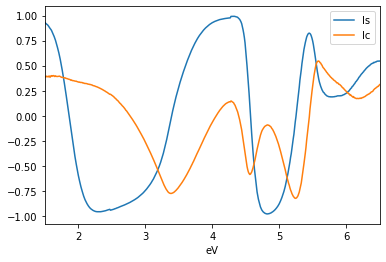

In [30]:
sig1.data.plot(x='eV', y=['Is', 'Ic'])


Signature de format Woolam/Nanometric

In [26]:
fname = "../data/EPIC_2009_55Deg.dat"
sig2 = signature(fname)
print (sig2.ellipso, sig2.analyser, sig2.modulator)

sig2.data.head(3)


Woolam 0.7853981633974483 0.0


,𝜆,angle,Psi,Delta,ErrPsi,ErrDelta
0,192.948230,0.959931,0.600457,2.434026,0.006148,0.010011
1,194.539038,0.959931,0.606778,2.479310,0.004457,0.007487
2,196.129883,0.959931,0.583185,2.535811,0.003587,0.006331


### Sauvegarde d'une signature (sérialisation avec Pickle) :
N.B. : marche avec tout type d'objet.

In [27]:
import pickle

pickle.dump(sig2, open( "MaSignature.dat", "wb" ))   # sauvegarde

sig3 = pickle.load(open( "MaSignature.dat", "rb" ))  # lecture

In [28]:
sig3.data.head()

,𝜆,angle,Psi,Delta,ErrPsi,ErrDelta
0,192.948230,0.959931,0.600457,2.434026,0.006148,0.010011
1,194.539038,0.959931,0.606778,2.479310,0.004457,0.007487
2,196.129883,0.959931,0.583185,2.535811,0.003587,0.006331
3,197.720776,0.959931,0.570882,2.617305,0.002722,0.004985
4,199.311694,0.959931,0.585353,2.706325,0.002172,0.004111


### Affichage

/Users/ss211692/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 120582 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ss211692/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 120582 missing from current font.
  font.load_char(ord(s), flags=flags)


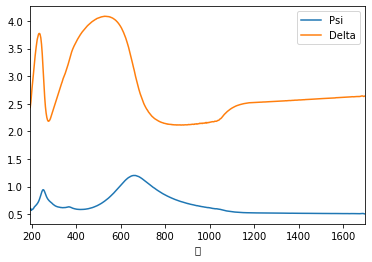

In [29]:
sig2.data.plot(x='𝜆', y=['Psi', 'Delta'])